#Computational drug discovery: part 5
##Comparing Regressors

In [1]:
# Import libraries
# Lazy Predict: fit and evaluate all the models from scikit-learn with a single line of code
! pip install lazypredict

     |████████████████████████████████| 248 kB 5.0 MB/s 
     |████████████████████████████████| 10.1 MB 56.9 MB/s 
     |████████████████████████████████| 302 kB 59.4 MB/s 
     |████████████████████████████████| 127.6 MB 10 kB/s 
     |████████████████████████████████| 6.8 MB 13.0 MB/s 
     |████████████████████████████████| 269 kB 51.3 MB/s 
     |████████████████████████████████| 14.5 MB 7.8 kB/s 
     |████████████████████████████████| 1.2 MB 73.0 MB/s 
     |████████████████████████████████| 25.9 MB 960 bytes/s 
     |████████████████████████████████| 72 kB 806 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=afb8094022159a7812a5058a799c737027e3d48155e45f281da9181af4a44ac9
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully

In [1]:
! pip install pandas

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Load the data
! wget -O genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv https://raw.githubusercontent.com/AnVales/Drug-discovery/main/genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2021-09-13 09:55:44--  https://raw.githubusercontent.com/AnVales/Drug-discovery/main/genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 429392 (419K) [text/plain]
Saving to: ‘genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

genital_herpes_06_b 100%[===================>] 419.33K  --.-KB/s    in 0.04s   

2021-09-13 09:55:45 (11.6 MB/s) - ‘genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [429392/429392]



In [4]:
bioactivity_data = pd.read_csv('genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
# Let's have the two sets
X  = bioactivity_data.drop('pIC50', axis=1)
Y  = bioactivity_data.pIC50

In [6]:
# Pre-processing
X.shape

(235, 881)

In [7]:
Y.shape

(235,)

In [8]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(235, 166)

In [9]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [10]:
# Let's compare machine learning algorithms

# Defines and builds the lazyclassifier
# It is very similar to sklearn models
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train, test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:18<00:00,  2.32it/s]


In [ ]:
# Let's compare machine learning algorithms

# Defines and builds the lazyclassifier
# It is very similar to sklearn models
# Defines and builds the lazyclassifier
# clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
# models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
# models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

In [12]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,21113621947026811174055425335003007918121369927...,-5507901377485255043537831831598311797360175091...,35462958888482929680088736069228843049158676101...,0.23
TransformedTargetRegressor,91163447121417548595200.00,-237817688142828370132992.00,736892213330.04,0.03
LinearRegression,91163447121417548595200.00,-237817688142828370132992.00,736892213330.04,0.03
KernelRidge,6.62,-13.67,5.79,0.06
GaussianProcessRegressor,4.57,-8.32,4.61,0.05
RANSACRegressor,2.13,-1.95,2.60,1.10
LassoLars,1.38,-0.00,1.51,0.03
DummyRegressor,1.38,-0.00,1.51,0.02
Lasso,1.38,-0.00,1.51,0.03


In [15]:
# Performance table of the test set (80% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,21113621947026811174055425335003007918121369927...,-5507901377485255043537831831598311797360175091...,35462958888482929680088736069228843049158676101...,0.23
TransformedTargetRegressor,91163447121417548595200.00,-237817688142828370132992.00,736892213330.04,0.03
LinearRegression,91163447121417548595200.00,-237817688142828370132992.00,736892213330.04,0.03
KernelRidge,6.62,-13.67,5.79,0.06
GaussianProcessRegressor,4.57,-8.32,4.61,0.05
RANSACRegressor,2.13,-1.95,2.60,1.10
LassoLars,1.38,-0.00,1.51,0.03
DummyRegressor,1.38,-0.00,1.51,0.02
Lasso,1.38,-0.00,1.51,0.03


[(0.0, 1.0)]

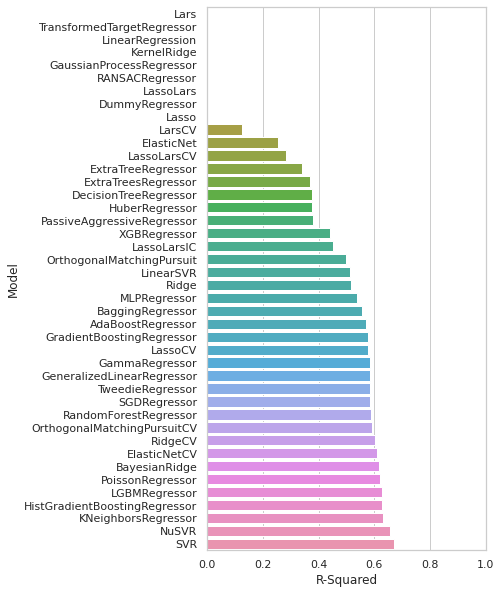

In [16]:
# Data visualization of model performance
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

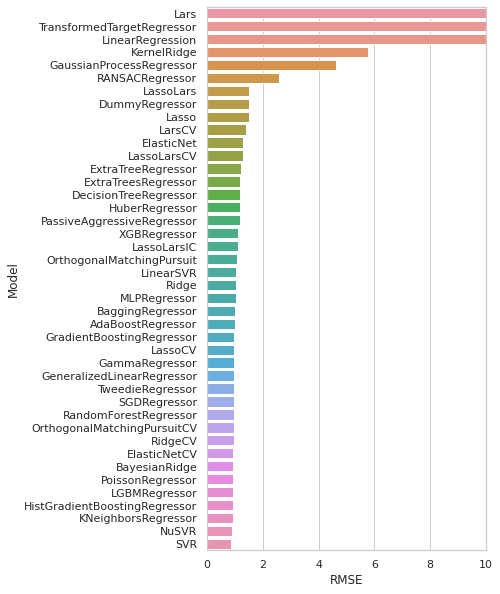

In [17]:
# Bar plot of RMSE values: differences between the values predicted by the model and the observed values.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0,10))

[(0.0, 10.0)]

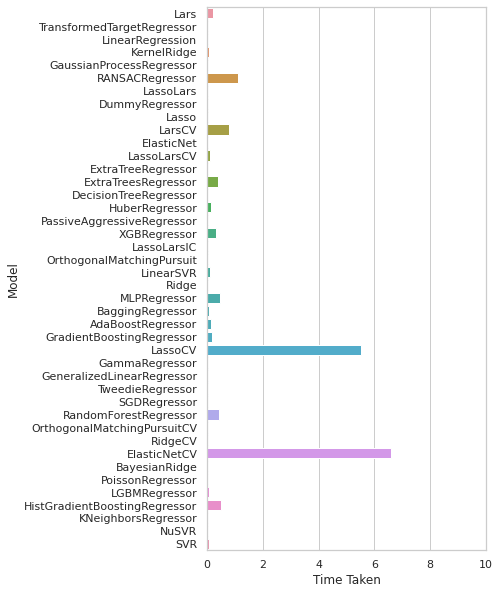

In [19]:
# Bar plot of the calculation time 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y = train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))